In [2]:
from figurex.figure import Figure, Panel

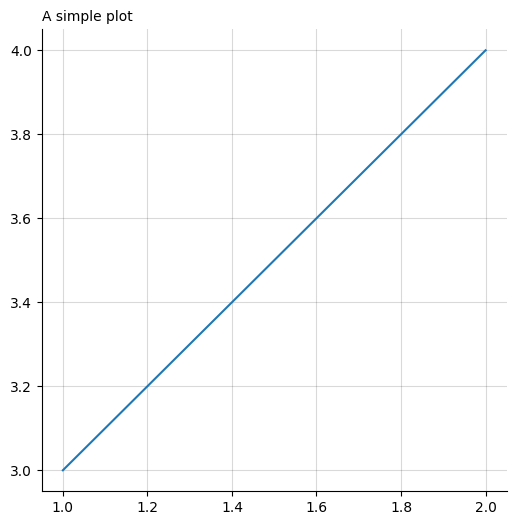

In [3]:
with Figure("A simple plot") as ax:
    ax.plot([1,2],[3,4])

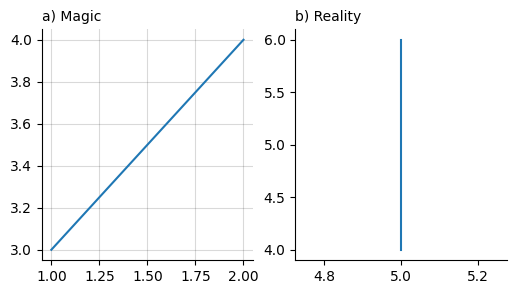

In [4]:
with Figure(layout=(1,2), size=(6,3)):
    with Panel("a) Magic") as ax:
        ax.plot([1,2],[3,4])
    with Panel("b) Reality", grid="") as ax:
        ax.plot([5,5],[6,4])

In [5]:
with Figure("Tea party", save="memory") as memory:
    with Panel() as ax:
        ax.plot([5,5],[6,4])
memory

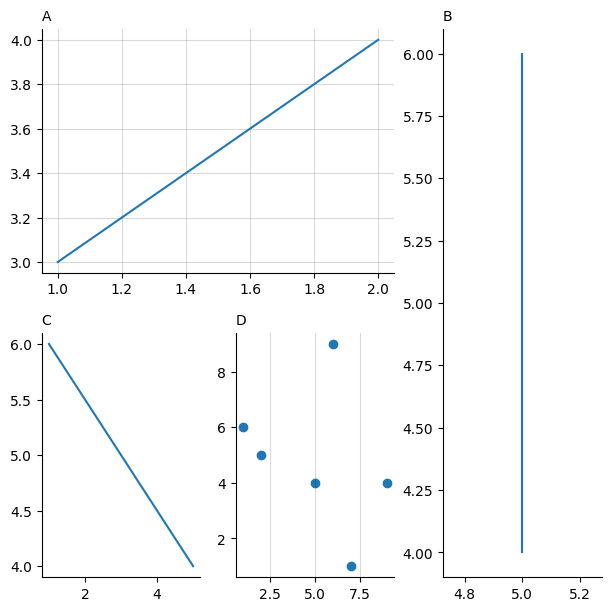

In [6]:
with Figure(layout=[[0,0,1],[2,3,1]], grid="xy"):
    with Panel("A") as ax:
        ax.plot([1,2],[3,4])
    with Panel("B", grid="") as ax:
        ax.plot([5,5],[6,4])
    with Panel("C", grid="") as ax:
        ax.plot([1,5],[6,4])
    with Panel("D", grid="x") as ax:
        ax.scatter([1,5,6,2,7,9],[6,4,9,5,1,4])
